### "The World Development Indicators from the World Bank contain over a thousand annual indicators of economic development from hundreds of countries around the world."

Here is the [dataset](https://www.kaggle.com/worldbank/world-development-indicators) I used for this mini project. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import data
world_data = pd.read_csv('Indicators.csv')
world_data.shape

(5656458, 6)

In [3]:
world_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
print('In this dataset, ' + str(world_data['CountryName'].nunique()) + ' different countries are represented.')
print('There are ' + str(world_data['Year'].nunique()) + ' years worth of data to be explored and ' 
      + str(world_data['IndicatorCode'].nunique()) + ' unique indicators of development to study.')

In this dataset, 247 different countries are represented.
There are 56 years worth of data to be explored and 1344 unique indicators of development to study.


In [5]:
USA_data = world_data[(world_data.CountryName == 'United States') & (world_data.Year == 2000)]
print('In 2000, data about ' + str(USA_data['IndicatorCode'].nunique()) 
      + ' different indicators were collected about the United States.')

In 2000, data about 646 different indicators were collected about the United States.


## Data Viz
### Exploring CO2 Emissions per capita in the USA over time.

In [6]:
graph_data = world_data[(world_data.CountryName == 'United States') 
                         & (world_data.IndicatorName == 'CO2 emissions (metric tons per capita)')]

print("Shape:", graph_data.shape)
print("Length:", len(graph_data))
graph_data.head()

Shape: (52, 6)
Length: 52


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


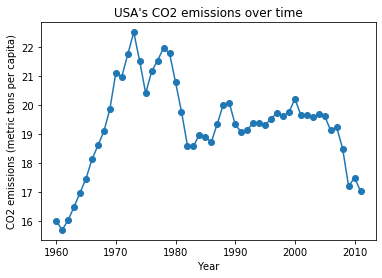

In [7]:
%matplotlib inline
plt.plot(graph_data.Year, graph_data.Value, '-o')
plt.xlabel('Year')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title("USA's CO2 emissions over time")
plt.show()

### How does USA's 2011 CO2 emission relate to other countries?

In [8]:
graph_2_data = world_data[(world_data.Year == 2011) 
                         & (world_data.IndicatorName == 'CO2 emissions (metric tons per capita)')]

## Pulling out a single data point.
graph_2_data[graph_2_data['CountryName'] == 'United States']

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5194727,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,17.020216


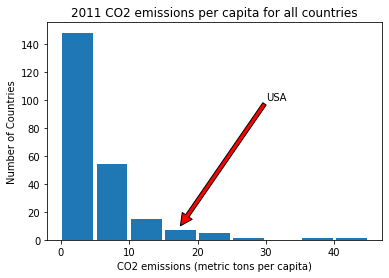

In [9]:
bins = range(0, 50, 5)
plt.hist(graph_2_data['Value'], bins, histtype='bar', rwidth=.9)
plt.xlabel('CO2 emissions (metric tons per capita)')
plt.ylabel('Number of Countries')
plt.title('2011 CO2 emissions per capita for all countries')
plt.annotate('USA', xy=(17.5, 10), xytext=(30, 100), arrowprops=dict(facecolor='red'))
plt.show()

### Comparing USA GDP to CO2 emissions per capita

In [10]:
USA_CO2_emissions = world_data[(world_data.CountryName == 'United States') &
                                (world_data.IndicatorName == 'CO2 emissions (metric tons per capita)')]
USA_GDP_per_capita = world_data[(world_data.CountryName == 'United States') &
                                (world_data.IndicatorName == 'GDP per capita (constant 2005 US$)')]

## Merge the 2 DataFrame's together
merged_data = USA_CO2_emissions.merge(USA_GDP_per_capita, on='Year', how='inner')
merged_data = merged_data.rename(columns={'Value_y': 'GDP_per_capita'})
merged_data = merged_data.rename(columns={'Value_x': 'CO2_Emissions'})
merged_data.head()

,CountryName_x,CountryCode_x,IndicatorName_x,IndicatorCode_x,Year,CO2_Emissions,CountryName_y,CountryCode_y,IndicatorName_y,IndicatorCode_y,GDP_per_capita
0,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,15482.707760
1,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,15578.409657
2,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,16276.426685
3,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,16749.789436
4,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,17476.822248


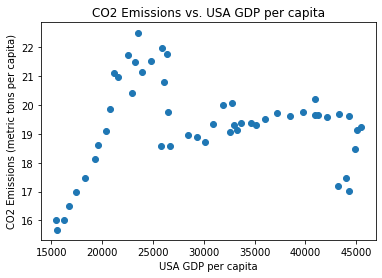

In [11]:
## Plotting 
plt.scatter(merged_data.GDP_per_capita, merged_data.CO2_Emissions,)
plt.xlabel('USA GDP per capita')
plt.ylabel('CO2 Emissions (metric tons per capita)')
plt.title('CO2 Emissions vs. USA GDP per capita')
plt.show()

### Examining USA's Fossil fuel energy consumption (% of total energy consumption) from 1960 to 2011

In [12]:
USA_fossil_fuels = world_data[(world_data.CountryName == 'United States') 
                               & (world_data.IndicatorName == 'Fossil fuel energy consumption (% of total)')]

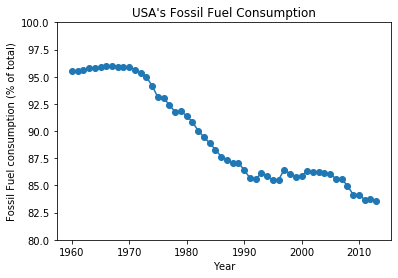

In [13]:
## Plotting
plt.plot(USA_fossil_fuels.Year, USA_fossil_fuels.Value, '-o')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel consumption (% of total)')
plt.ylim(80, 100)
plt.title("USA's Fossil Fuel Consumption")
plt.show()

### Comparing USA Fossil fuel energy consumption (% of total energy consumption) to CO2 emissions per capita from 1960 to 2011

In [14]:
merged_data_2 = USA_CO2_emissions.merge(USA_fossil_fuels, on='Year', how='inner')
merged_data_2 = merged_data_2.rename(columns={'Value_x': 'CO2_Emissions'})
merged_data_2 = merged_data_2.rename(columns={'Value_y': 'Fossil_Fuels'})

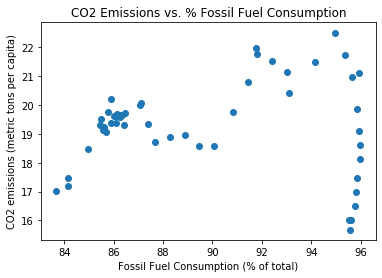

In [15]:
## Plotting 
plt.scatter(merged_data_2.Fossil_Fuels, merged_data_2.CO2_Emissions)
plt.xlabel('Fossil Fuel Consumption (% of total)')
plt.ylabel('CO2 emissions (metric tons per capita)')
plt.title('CO2 Emissions vs. % Fossil Fuel Consumption')
plt.show()